# __Impact Analysis of Monkeypox Case Study__

## **Business Understanding**

**The Monkeypox outbreak**, though not as widespread as other pandemics, poses significant public health challenges globally, especially in regions where the virus is most prevalent. As governments and health organizations strive to contain the spread, there is a need to **analyze Monkeypox data to extract actionable insights** that can aid in **public health responses and policy formation**. The objective of this project is to analyze global Monkeypox data, particularly focusing on regional trends, severity, and demographic impacts to support **strategic interventions**. The key aspects of this analysis will include:

1. **Epidemiologic Trends**: Investigating the spread of Monkeypox across different regions, focusing on factors such as new cases, total cases, and mortality rates.

2. **Regional Comparisons**: Comparing various countries and regions to understand how Monkeypox affects different areas, identifying regions with high transmission and high mortality rates.

3. **Demographic Trends**: Analyzing the impact of Monkeypox based on available demographic data (e.g., population or regions) to highlight vulnerable groups or areas requiring urgent attention.

4. **Temporal Analysis**: Examining how the outbreak has evolved over time, identifying any patterns or spikes in infections and deaths that could guide future preventive measures.

5. **Identification of High-risk Regions**: Identifikasi wilayah-wilayah berisiko tinggi berdasarkan total kasus dan kematian baru.


### **Problem Points**

Meskipun Monkeypox tidak sepopuler pandemi lainnya, penyebarannya tetap menimbulkan tantangan signifikan bagi kesehatan masyarakat global, terutama di negara-negara di mana virus ini lebih dominan. Beberapa masalah utama yang perlu dianalisis dari data ini adalah:

1. Identifikasi Tren Penyebaran: Bagaimana Monkeypox menyebar di berbagai wilayah dan negara? Adakah wilayah yang lebih rentan terhadap penyebaran ini?
2. Korelasi antara Kasus dan Kematian: Apakah ada hubungan yang signifikan antara jumlah kasus baru dengan angka kematian di setiap negara?
3. Perbandingan Regional: Negara atau wilayah mana yang memiliki jumlah kasus dan kematian tertinggi, serta bagaimana hal ini berkembang dari waktu ke waktu?
4. Analisis Temporal: Apakah terdapat pola atau lonjakan dalam penyebaran Monkeypox berdasarkan waktu, misalnya pada musim tertentu atau periode waktu tertentu dalam satu tahun?
5. Identifikasi Wilayah Berisiko Tinggi: Berdasarkan data kasus dan kematian baru, wilayah mana yang dapat dianggap sebagai "hotspot" yang memerlukan intervensi kesehatan masyarakat segera?


## **Data Understanding**

**Data Description**

1. location: Nama negara atau wilayah yang melaporkan data.
2. date: Tanggal data dilaporkan dengan format YYYY-MM-DD.
3. new_cases: Jumlah kasus baru Monkeypox yang dilaporkan pada tanggal tersebut di suatu negara/wilayah.
4. new_deaths: Jumlah kematian baru yang dilaporkan pada tanggal tersebut di suatu negara/wilayah.
5. total_cases: Jumlah kumulatif kasus Monkeypox yang tercatat di suatu negara/wilayah hingga tanggal tersebut.
6. total_deaths: Jumlah kumulatif kematian yang tercatat di suatu negara/wilayah hingga tanggal tersebut.
7. new_cases_per_million: Jumlah kasus baru per satu juta penduduk di wilayah tersebut pada tanggal tertentu.
8. total_cases_per_million: Jumlah kumulatif kasus per satu juta penduduk hingga tanggal tertentu.
9. new_deaths_per_million: Jumlah kematian baru per satu juta penduduk di wilayah tersebut pada tanggal tertentu.
10. total_deaths_per_million: Jumlah kumulatif kematian per satu juta penduduk hingga tanggal tertentu.
11. new_cases_smoothed: Rata-rata jumlah kasus baru harian yang dihaluskan (smoothed) selama periode waktu tertentu.
12. new_deaths_smoothed: Rata-rata jumlah kematian baru harian yang dihaluskan (smoothed) selama periode waktu tertentu.
13. new_cases_smoothed_per_million: Rata-rata jumlah kasus baru harian yang dihaluskan per satu juta penduduk.
14. new_deaths_smoothed_per_million: Rata-rata jumlah kematian baru harian yang dihaluskan per satu juta penduduk.
15. suspected_cases_cumulative: Jumlah kasus Monkeypox yang dicurigai hingga tanggal tertentu (jika data tersedia).
16. annotation: Catatan tambahan atau informasi terkait laporan data pada tanggal tertentu (misalnya, revisi atau koreksi data).

**Data Grouping**

1. Total Kasus dan Kematian per Negara/Wilayah: Menghitung jumlah total kasus dan kematian Monkeypox di setiap negara atau wilayah.
2. Perkembangan Kasus per Hari: Mengelompokkan data berdasarkan tanggal untuk melihat tren penyebaran harian.
3. Distribusi Kasus Baru per Wilayah: Melihat distribusi kasus baru berdasarkan lokasi dan waktu untuk memahami wilayah yang terkena dampak paling parah dalam periode tertentu.
4. Analisis Rasio Fatalitas Kasus (Case Fatality Ratio): Menghitung rasio fatalitas kasus (CFR) sebagai jumlah total kematian dibagi jumlah total kasus di setiap negara/wilayah untuk mengidentifikasi wilayah dengan tingkat fatalitas yang tinggi.
5. Identifikasi Wilayah Berisiko Tinggi (Hotspot Analysis): Mengelompokkan wilayah berdasarkan total kasus dan kematian serta menggunakan metrik seperti total_cases_per_million dan total_deaths_per_million untuk mengidentifikasi wilayah yang memerlukan intervensi kesehatan lebih lanjut.

## **Data Preparation**

### Import Library

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Gathering Data (Import File)

In [95]:
# Load the dataset
file_path = 'monkeypox.csv'
df = pd.read_csv(file_path)

C:\Users\Ryan\AppData\Local\Temp\ipykernel_22596\2741405043.py:3: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [96]:
# Convert 'date' column to datetime for easier analysis
df['date'] = pd.to_datetime(df['date'])

In [97]:
# Preview the dataset
print(df.head())

  location       date  iso_code  total_cases  total_deaths  new_cases  \
0   Africa 2022-05-01  OWID_AFR         42.0           2.0        2.0   
1   Africa 2022-05-02  OWID_AFR         42.0           2.0        0.0   
2   Africa 2022-05-03  OWID_AFR         42.0           2.0        0.0   
3   Africa 2022-05-04  OWID_AFR         42.0           2.0        0.0   
4   Africa 2022-05-05  OWID_AFR         42.0           2.0        0.0   

   new_deaths  new_cases_smoothed  new_deaths_smoothed  new_cases_per_million  \
0         0.0                0.29                  0.0                  0.001   
1         0.0                0.29                  0.0                  0.000   
2         0.0                0.29                  0.0                  0.000   
3         0.0                0.29                  0.0                  0.000   
4         0.0                0.29                  0.0                  0.000   

   total_cases_per_million  new_cases_smoothed_per_million  \
0           

In [98]:
display(df)

,location,date,iso_code,total_cases,total_deaths,new_cases,new_deaths,new_cases_smoothed,new_deaths_smoothed,new_cases_per_million,total_cases_per_million,new_cases_smoothed_per_million,new_deaths_per_million,total_deaths_per_million,new_deaths_smoothed_per_million,suspected_cases_cumulative,annotation
0,Africa,2022-05-01,OWID_AFR,42.0,2.0,2.0,0.0,0.29,0.0,0.001,0.030,0.000,0.0,0.00141,0.0,NaN,NaN
1,Africa,2022-05-02,OWID_AFR,42.0,2.0,0.0,0.0,0.29,0.0,0.000,0.030,0.000,0.0,0.00141,0.0,NaN,NaN
2,Africa,2022-05-03,OWID_AFR,42.0,2.0,0.0,0.0,0.29,0.0,0.000,0.030,0.000,0.0,0.00141,0.0,NaN,NaN
3,Africa,2022-05-04,OWID_AFR,42.0,2.0,0.0,0.0,0.29,0.0,0.000,0.030,0.000,0.0,0.00141,0.0,NaN,NaN
4,Africa,2022-05-05,OWID_AFR,42.0,2.0,0.0,0.0,0.29,0.0,0.000,0.030,0.000,0.0,0.00141,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90053,World,2024-09-12,NaN,106965.0,234.0,1.0,0.0,33.29,0.0,0.000,13.151,0.004,0.0,0.02877,0.0,NaN,NaN
90054,World,2024-09-13,NaN,106965.0,234.0,0.0,0.0,33.29,0.0,0.000,13.151,0.004,0.0,0.02877,0.0,NaN,NaN
90055,World,2024-09-14,NaN,106965.0,234.0,0.0,0.0,33.29,0.0,0.000,13.151,0.004,0.0,0.02877,0.0,NaN,NaN
90056,World,2024-09-15,NaN,107363.0,234.0,398.0,0.0,57.00,0.0,0.049,13.199,0.007,0.0,0.02877,0.0,NaN,NaN


In [99]:
# Summary statistics for initial understanding
summary = df.describe()
print(summary)

                                date    total_cases  total_deaths  \
count                          90058   90051.000000  90051.000000   
mean   2023-07-27 02:55:10.986252800    2312.409657      4.292878   
min              2022-05-01 00:00:00       0.000000      0.000000   
25%              2023-01-07 00:00:00       5.000000      0.000000   
50%              2023-07-29 00:00:00      40.000000      0.000000   
75%              2024-02-15 00:00:00     328.000000      1.000000   
max              2024-09-23 00:00:00  107363.000000    234.000000   
std                              NaN    9858.145251     19.230875   

          new_cases    new_deaths  new_cases_smoothed  new_deaths_smoothed  \
count  90051.000000  90051.000000        90051.000000         90051.000000   
mean       3.575341      0.007729            3.558704             0.007705   
min        0.000000      0.000000            0.000000             0.000000   
25%        0.000000      0.000000            0.000000             

### Check Data

In [100]:
# Count rows of dataset
jumlah_data = len(df)
print("Jumlah data:", jumlah_data)

Jumlah data: 90058


In [101]:
# Counting the number of rows and columns
print("Number of rows and columns:", df.shape)

Number of rows and columns: (90058, 17)


In [102]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
  location       date  iso_code  total_cases  total_deaths  new_cases  \
0   Africa 2022-05-01  OWID_AFR         42.0           2.0        2.0   
1   Africa 2022-05-02  OWID_AFR         42.0           2.0        0.0   
2   Africa 2022-05-03  OWID_AFR         42.0           2.0        0.0   
3   Africa 2022-05-04  OWID_AFR         42.0           2.0        0.0   
4   Africa 2022-05-05  OWID_AFR         42.0           2.0        0.0   

   new_deaths  new_cases_smoothed  new_deaths_smoothed  new_cases_per_million  \
0         0.0                0.29                  0.0                  0.001   
1         0.0                0.29                  0.0                  0.000   
2         0.0                0.29                  0.0                  0.000   
3         0.0                0.29                  0.0                  0.000   
4         0.0                0.29                  0.0                  0.000   

   total_cases_per_million  new_cases_smoothe

In [103]:
# Melihat beberapa baris terakhir dataset
print("\nLast 5 rows of the dataset:")
print(df.tail())


Last 5 rows of the dataset:
      location       date iso_code  total_cases  total_deaths  new_cases  \
90053    World 2024-09-12      NaN     106965.0         234.0        1.0   
90054    World 2024-09-13      NaN     106965.0         234.0        0.0   
90055    World 2024-09-14      NaN     106965.0         234.0        0.0   
90056    World 2024-09-15      NaN     107363.0         234.0      398.0   
90057    World 2024-09-16      NaN     107363.0         234.0        0.0   

       new_deaths  new_cases_smoothed  new_deaths_smoothed  \
90053         0.0               33.29                  0.0   
90054         0.0               33.29                  0.0   
90055         0.0               33.29                  0.0   
90056         0.0               57.00                  0.0   
90057         0.0               57.00                  0.0   

       new_cases_per_million  total_cases_per_million  \
90053                  0.000                   13.151   
90054                  0.00

### Assessing Data

In [104]:
# Counting the number of duplicate entries
# Counting the number of null values in each column
print("Jumlah duplikasi: ", df.duplicated().sum())
print("\n")

print("Data Null:")
for key, data in df.isnull().sum().items():
    print(f"{key}: {data}")

Jumlah duplikasi:  0


Data Null:
location: 0
date: 0
iso_code: 877
total_cases: 7
total_deaths: 7
new_cases: 7
new_deaths: 7
new_cases_smoothed: 7
new_deaths_smoothed: 7
new_cases_per_million: 7
total_cases_per_million: 7
new_cases_smoothed_per_million: 7
new_deaths_per_million: 7
total_deaths_per_million: 7
new_deaths_smoothed_per_million: 7
suspected_cases_cumulative: 89995
annotation: 89188


In [105]:
# Memeriksa dimensi dataset (jumlah baris dan kolom)
print("\nShape of the dataset:")
print(df.shape)


Shape of the dataset:
(90058, 17)


In [106]:
# Memeriksa informasi tipe data, kolom, dan missing values
print("\nInfo of the dataset:")
print(df.info())


Info of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90058 entries, 0 to 90057
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   location                         90058 non-null  object        
 1   date                             90058 non-null  datetime64[ns]
 2   iso_code                         89181 non-null  object        
 3   total_cases                      90051 non-null  float64       
 4   total_deaths                     90051 non-null  float64       
 5   new_cases                        90051 non-null  float64       
 6   new_deaths                       90051 non-null  float64       
 7   new_cases_smoothed               90051 non-null  float64       
 8   new_deaths_smoothed              90051 non-null  float64       
 9   new_cases_per_million            90051 non-null  float64       
 10  total_cases_per_million          900

In [107]:
# Melihat deskripsi statistik dasar untuk kolom numerik
print("\nStatistical description of numerical columns:")
print(df.describe())


Statistical description of numerical columns:
                                date    total_cases  total_deaths  \
count                          90058   90051.000000  90051.000000   
mean   2023-07-27 02:55:10.986252800    2312.409657      4.292878   
min              2022-05-01 00:00:00       0.000000      0.000000   
25%              2023-01-07 00:00:00       5.000000      0.000000   
50%              2023-07-29 00:00:00      40.000000      0.000000   
75%              2024-02-15 00:00:00     328.000000      1.000000   
max              2024-09-23 00:00:00  107363.000000    234.000000   
std                              NaN    9858.145251     19.230875   

          new_cases    new_deaths  new_cases_smoothed  new_deaths_smoothed  \
count  90051.000000  90051.000000        90051.000000         90051.000000   
mean       3.575341      0.007729            3.558704             0.007705   
min        0.000000      0.000000            0.000000             0.000000   
25%        0.000000

In [108]:
# Memeriksa jumlah missing values per kolom
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
location                               0
date                                   0
iso_code                             877
total_cases                            7
total_deaths                           7
new_cases                              7
new_deaths                             7
new_cases_smoothed                     7
new_deaths_smoothed                    7
new_cases_per_million                  7
total_cases_per_million                7
new_cases_smoothed_per_million         7
new_deaths_per_million                 7
total_deaths_per_million               7
new_deaths_smoothed_per_million        7
suspected_cases_cumulative         89995
annotation                         89188
dtype: int64


### Cleaning Data

In [109]:
# Mengubah kolom 'date' menjadi tipe datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Memeriksa data yang gagal diubah ke datetime
invalid_dates = df[df['date'].isna()]
print("\nInvalid date entries (rows with missing dates after conversion):")
print(invalid_dates)


Invalid date entries (rows with missing dates after conversion):
Empty DataFrame
Columns: [location, date, iso_code, total_cases, total_deaths, new_cases, new_deaths, new_cases_smoothed, new_deaths_smoothed, new_cases_per_million, total_cases_per_million, new_cases_smoothed_per_million, new_deaths_per_million, total_deaths_per_million, new_deaths_smoothed_per_million, suspected_cases_cumulative, annotation]
Index: []


In [110]:
# Mengatasi missing values
# Untuk baris yang mengandung missing values pada kolom new_cases, new_deaths, total_cases, atau total_deaths, kita akan menghapusnya
data_cleaned = df.dropna(subset=['new_cases', 'new_deaths', 'total_cases', 'total_deaths'])

# Verifikasi bahwa tidak ada lagi missing values
print("\nMissing values after cleaning:")
print(data_cleaned.isnull().sum())


Missing values after cleaning:
location                               0
date                                   0
iso_code                             870
total_cases                            0
total_deaths                           0
new_cases                              0
new_deaths                             0
new_cases_smoothed                     0
new_deaths_smoothed                    0
new_cases_per_million                  0
total_cases_per_million                0
new_cases_smoothed_per_million         0
new_deaths_per_million                 0
total_deaths_per_million               0
new_deaths_smoothed_per_million        0
suspected_cases_cumulative         89995
annotation                         89182
dtype: int64


In [111]:
# Mengecek apakah ada nilai duplikat
duplicates = data_cleaned.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Jika ada duplikat, kita akan menghapusnya
if duplicates > 0:
    data_cleaned = data_cleaned.drop_duplicates()

# Verifikasi kembali dimensi data setelah cleaning
print(f"\nShape of the dataset after cleaning: {data_cleaned.shape}")


Number of duplicate rows: 0

Shape of the dataset after cleaning: (90051, 17)


In [112]:
# Mengecek nilai-nilai aneh atau di luar batas logis (contoh: kasus negatif)
negative_cases = data_cleaned[(data_cleaned['new_cases'] < 0) | (data_cleaned['new_deaths'] < 0)]
print("\nRows with negative case values (if any):")
print(negative_cases)

# Jika ada nilai negatif yang tidak valid, bisa dihapus
data_cleaned = data_cleaned[(data_cleaned['new_cases'] >= 0) & (data_cleaned['new_deaths'] >= 0)]


Rows with negative case values (if any):
Empty DataFrame
Columns: [location, date, iso_code, total_cases, total_deaths, new_cases, new_deaths, new_cases_smoothed, new_deaths_smoothed, new_cases_per_million, total_cases_per_million, new_cases_smoothed_per_million, new_deaths_per_million, total_deaths_per_million, new_deaths_smoothed_per_million, suspected_cases_cumulative, annotation]
Index: []


In [113]:
# Memeriksa outliers pada kolom new_cases dan total_cases dengan IQR
Q1 = data_cleaned['new_cases'].quantile(0.25)
Q3 = data_cleaned['new_cases'].quantile(0.75)
IQR = Q3 - Q1

outliers = data_cleaned[(data_cleaned['new_cases'] < (Q1 - 1.5 * IQR)) | (data_cleaned['new_cases'] > (Q3 + 1.5 * IQR))]
print("\nPotential outliers based on new_cases:")
print(outliers)


Potential outliers based on new_cases:
      location       date  iso_code  total_cases  total_deaths  new_cases  \
0       Africa 2022-05-01  OWID_AFR         42.0           2.0        2.0   
14      Africa 2022-05-15  OWID_AFR         46.0           2.0        4.0   
21      Africa 2022-05-22  OWID_AFR         58.0           2.0       12.0   
32      Africa 2022-06-02  OWID_AFR         59.0           2.0        1.0   
35      Africa 2022-06-05  OWID_AFR         77.0           3.0       18.0   
...        ...        ...       ...          ...           ...        ...   
90043    World 2024-09-02       NaN     106730.0         234.0        1.0   
90044    World 2024-09-03       NaN     106732.0         234.0        2.0   
90049    World 2024-09-08       NaN     106964.0         234.0      232.0   
90053    World 2024-09-12       NaN     106965.0         234.0        1.0   
90056    World 2024-09-15       NaN     107363.0         234.0      398.0   

       new_deaths  new_cases_smooth

In [114]:
# Setelah data bersih, simpan hasil cleaning
print("\nCleaned data preview:")
print(data_cleaned.head())


Cleaned data preview:
  location       date  iso_code  total_cases  total_deaths  new_cases  \
0   Africa 2022-05-01  OWID_AFR         42.0           2.0        2.0   
1   Africa 2022-05-02  OWID_AFR         42.0           2.0        0.0   
2   Africa 2022-05-03  OWID_AFR         42.0           2.0        0.0   
3   Africa 2022-05-04  OWID_AFR         42.0           2.0        0.0   
4   Africa 2022-05-05  OWID_AFR         42.0           2.0        0.0   

   new_deaths  new_cases_smoothed  new_deaths_smoothed  new_cases_per_million  \
0         0.0                0.29                  0.0                  0.001   
1         0.0                0.29                  0.0                  0.000   
2         0.0                0.29                  0.0                  0.000   
3         0.0                0.29                  0.0                  0.000   
4         0.0                0.29                  0.0                  0.000   

   total_cases_per_million  new_cases_smoothed_per_

In [115]:
# showing the entire of dataset
display(data_cleaned)

,location,date,iso_code,total_cases,total_deaths,new_cases,new_deaths,new_cases_smoothed,new_deaths_smoothed,new_cases_per_million,total_cases_per_million,new_cases_smoothed_per_million,new_deaths_per_million,total_deaths_per_million,new_deaths_smoothed_per_million,suspected_cases_cumulative,annotation
0,Africa,2022-05-01,OWID_AFR,42.0,2.0,2.0,0.0,0.29,0.0,0.001,0.030,0.000,0.0,0.00141,0.0,NaN,NaN
1,Africa,2022-05-02,OWID_AFR,42.0,2.0,0.0,0.0,0.29,0.0,0.000,0.030,0.000,0.0,0.00141,0.0,NaN,NaN
2,Africa,2022-05-03,OWID_AFR,42.0,2.0,0.0,0.0,0.29,0.0,0.000,0.030,0.000,0.0,0.00141,0.0,NaN,NaN
3,Africa,2022-05-04,OWID_AFR,42.0,2.0,0.0,0.0,0.29,0.0,0.000,0.030,0.000,0.0,0.00141,0.0,NaN,NaN
4,Africa,2022-05-05,OWID_AFR,42.0,2.0,0.0,0.0,0.29,0.0,0.000,0.030,0.000,0.0,0.00141,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90053,World,2024-09-12,NaN,106965.0,234.0,1.0,0.0,33.29,0.0,0.000,13.151,0.004,0.0,0.02877,0.0,NaN,NaN
90054,World,2024-09-13,NaN,106965.0,234.0,0.0,0.0,33.29,0.0,0.000,13.151,0.004,0.0,0.02877,0.0,NaN,NaN
90055,World,2024-09-14,NaN,106965.0,234.0,0.0,0.0,33.29,0.0,0.000,13.151,0.004,0.0,0.02877,0.0,NaN,NaN
90056,World,2024-09-15,NaN,107363.0,234.0,398.0,0.0,57.00,0.0,0.049,13.199,0.007,0.0,0.02877,0.0,NaN,NaN


In [116]:
# Checking data type and column of dataset
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90051 entries, 0 to 90057
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   location                         90051 non-null  object        
 1   date                             90051 non-null  datetime64[ns]
 2   iso_code                         89181 non-null  object        
 3   total_cases                      90051 non-null  float64       
 4   total_deaths                     90051 non-null  float64       
 5   new_cases                        90051 non-null  float64       
 6   new_deaths                       90051 non-null  float64       
 7   new_cases_smoothed               90051 non-null  float64       
 8   new_deaths_smoothed              90051 non-null  float64       
 9   new_cases_per_million            90051 non-null  float64       
 10  total_cases_per_million          90051 non-null  float64       

## **Exploratory Data Analysis (EDA)**

In [117]:
# # Classify Locations (Manually identify continents and regions)
# regions_or_continents = ['World', 'Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania']  # Add more as needed
# data['location_type'] = data['location'].apply(lambda x: 'Region/Continent' if x in regions_or_continents else 'Country')

# Klasifikasi Negara dan Wilayah/Benua
# Daftar wilayah/benua yang bukan negara
regions_or_continents = ['World', 'Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania']  # Anda dapat menambahkannya jika diperlukan

# Menambahkan kolom baru 'location_type' untuk mengklasifikasikan antara 'Country' dan 'Region/Continent'
data_cleaned['location_type'] = data_cleaned['location'].apply(lambda x: 'Region/Continent' if x in regions_or_continents else 'Country')

# Memeriksa apakah pengelompokan berhasil
print("\nLocation types (Countries vs Regions/Continents):")
print(data_cleaned['location_type'].value_counts())

# Mengelompokkan data negara dan non-negara untuk analisis terpisah
countries_data = data_cleaned[data_cleaned['location_type'] == 'Country']
regions_data = data_cleaned[data_cleaned['location_type'] == 'Region/Continent']


Location types (Countries vs Regions/Continents):


location_type
Country             84025
Region/Continent     6026
Name: count, dtype: int64


In [118]:
# # Filter Dataset for Countries Only (Optional)
# countries_data = data_cleaned[data_cleaned['location_type'] == 'Country']

# Optional: Menampilkan jumlah negara dan wilayah yang teridentifikasi
print(f"\nJumlah Negara: {countries_data['location'].nunique()}")
print(f"Jumlah Wilayah/Benua: {regions_data['location'].nunique()}")

# Melihat dataset setelah diklasifikasikan antara negara dan bukan negara
print("\nDataset yang diklasifikasikan:")
display(data_cleaned)


Jumlah Negara: 123
Jumlah Wilayah/Benua: 7

Dataset yang diklasifikasikan:


,location,date,iso_code,total_cases,total_deaths,new_cases,new_deaths,new_cases_smoothed,new_deaths_smoothed,new_cases_per_million,total_cases_per_million,new_cases_smoothed_per_million,new_deaths_per_million,total_deaths_per_million,new_deaths_smoothed_per_million,suspected_cases_cumulative,annotation,location_type
0,Africa,2022-05-01,OWID_AFR,42.0,2.0,2.0,0.0,0.29,0.0,0.001,0.030,0.000,0.0,0.00141,0.0,NaN,NaN,Region/Continent
1,Africa,2022-05-02,OWID_AFR,42.0,2.0,0.0,0.0,0.29,0.0,0.000,0.030,0.000,0.0,0.00141,0.0,NaN,NaN,Region/Continent
2,Africa,2022-05-03,OWID_AFR,42.0,2.0,0.0,0.0,0.29,0.0,0.000,0.030,0.000,0.0,0.00141,0.0,NaN,NaN,Region/Continent
3,Africa,2022-05-04,OWID_AFR,42.0,2.0,0.0,0.0,0.29,0.0,0.000,0.030,0.000,0.0,0.00141,0.0,NaN,NaN,Region/Continent
4,Africa,2022-05-05,OWID_AFR,42.0,2.0,0.0,0.0,0.29,0.0,0.000,0.030,0.000,0.0,0.00141,0.0,NaN,NaN,Region/Continent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90053,World,2024-09-12,NaN,106965.0,234.0,1.0,0.0,33.29,0.0,0.000,13.151,0.004,0.0,0.02877,0.0,NaN,NaN,Region/Continent
90054,World,2024-09-13,NaN,106965.0,234.0,0.0,0.0,33.29,0.0,0.000,13.151,0.004,0.0,0.02877,0.0,NaN,NaN,Region/Continent
90055,World,2024-09-14,NaN,106965.0,234.0,0.0,0.0,33.29,0.0,0.000,13.151,0.004,0.0,0.02877,0.0,NaN,NaN,Region/Continent
90056,World,2024-09-15,NaN,107363.0,234.0,398.0,0.0,57.00,0.0,0.049,13.199,0.007,0.0,0.02877,0.0,NaN,NaN,Region/Continent


**1. Epidemiologic Trends: Investigasi Penyebaran Monkeypox**

Melihat tren penyebaran Monkeypox dengan fokus pada faktor kasus baru, total kasus, dan tingkat kematian.

In [119]:
# Melihat perkembangan kasus baru dan total kasus dari waktu ke waktu untuk negara
data_grouped_by_date_countries = countries_data.groupby('date').agg({
    'new_cases': 'sum',
    'total_cases': 'sum',
    'new_deaths': 'sum',
    'total_deaths': 'sum'
}).reset_index()


**2. Regional Comparisons: Perbandingan Antar Negara/Wilayah**

Membandingkan negara-negara untuk memahami bagaimana Monkeypox mempengaruhi berbagai wilayah.

In [120]:
# Melihat total kasus dan kematian di setiap negara
data_grouped_by_location_countries = countries_data.groupby('location').agg({
    'total_cases': 'max',
    'total_deaths': 'max'
}).reset_index()

# Melihat total kasus dan kematian di setiap wilayah/benua
data_grouped_by_location_regions = regions_data.groupby('location').agg({
    'total_cases': 'max',
    'total_deaths': 'max'
}).reset_index()

**3. Demographic Trends: Dampak Berdasarkan Wilayah**

Menganalisis dampak Monkeypox berdasarkan jumlah populasi atau kawasan regional.

In [121]:
# Melihat negara dengan total kasus tertinggi
top_countries = data_grouped_by_location_countries.nlargest(10, 'total_cases')


**4. Temporal Analysis: Analisis Waktu Penyebaran**

Menganalisis bagaimana penyebaran Monkeypox berubah seiring waktu.

In [122]:
# Pastikan kolom 'date' dalam format datetime
countries_data['date'] = pd.to_datetime(countries_data['date'], errors='coerce')

# Membuat kolom 'month' dalam format Year-Month
countries_data['month'] = countries_data['date'].dt.strftime('%Y-%m')

# Mengonversi kolom 'new_cases' dan 'new_deaths' menjadi numerik
countries_data['new_cases'] = pd.to_numeric(countries_data['new_cases'], errors='coerce')
countries_data['new_deaths'] = pd.to_numeric(countries_data['new_deaths'], errors='coerce')

# Mengelompokkan data berdasarkan 'month' dan menghitung total kasus serta kematian baru per bulan
cases_per_month_countries = countries_data.groupby('month').agg({
    'new_cases': 'sum',
    'new_deaths': 'sum'
}).reset_index()

C:\Users\Ryan\AppData\Local\Temp\ipykernel_22596\256107650.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_data['date'] = pd.to_datetime(countries_data['date'], errors='coerce')
C:\Users\Ryan\AppData\Local\Temp\ipykernel_22596\256107650.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_data['month'] = countries_data['date'].dt.strftime('%Y-%m')
C:\Users\Ryan\AppData\Local\Temp\ipykernel_22596\256107650.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

**5. Identification of High-risk Regions: Top Locations by Total New Cases and Deaths**

c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


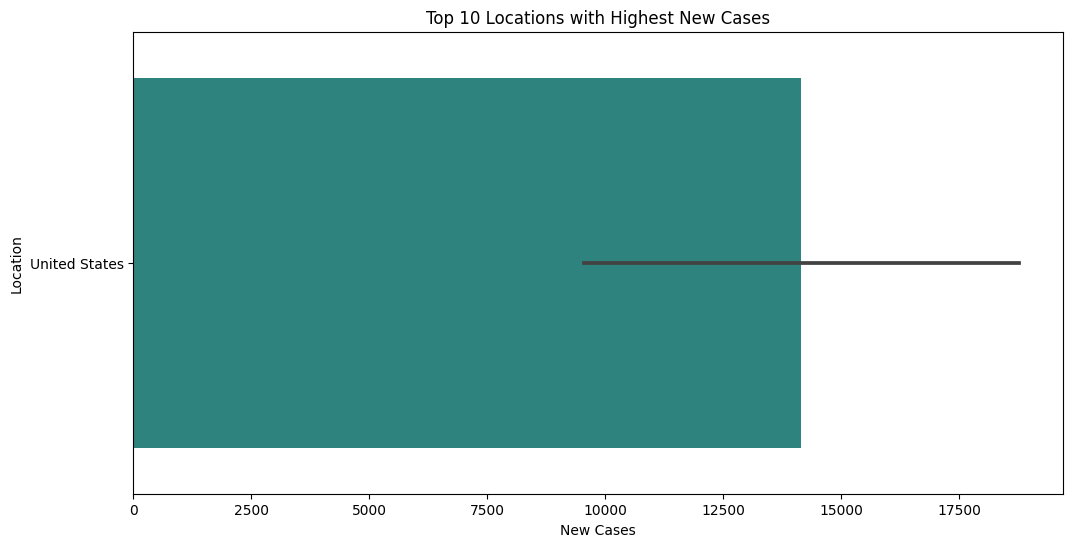

c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


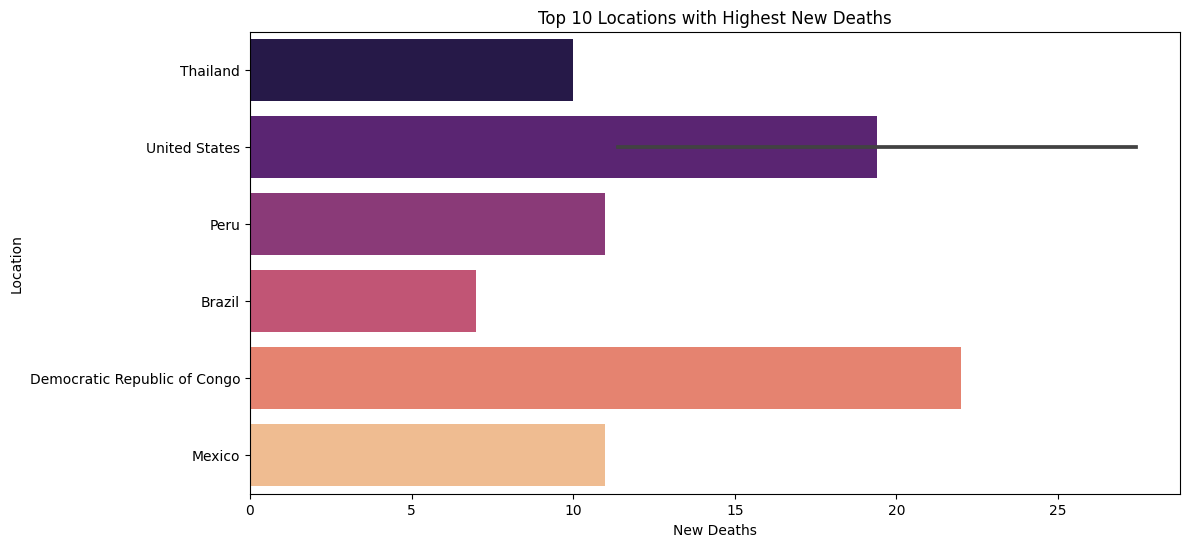

In [123]:
# Filter top 10 locations (countries) with highest new cases
top_10_locations_by_new_cases = countries_data.nlargest(10, 'new_cases')
plt.figure(figsize=(12, 6))
sns.barplot(x='total_cases', y='location', data=top_10_locations_by_new_cases, palette='viridis')
plt.title('Top 10 Locations with Highest New Cases')
plt.xlabel('New Cases')
plt.ylabel('Location')
plt.show()

# Filter top 10 locations (countries) with highest total deaths
top_10_locations_by_new_deaths = countries_data.nlargest(10, 'new_deaths')
plt.figure(figsize=(12, 6))
sns.barplot(x='total_deaths', y='location', data=top_10_locations_by_new_deaths, palette='magma')
plt.title('Top 10 Locations with Highest New Deaths')
plt.xlabel('New Deaths')
plt.ylabel('Location')
plt.show()

## **Data Visualization**

**1. Epidemiologic Trends: Investigasi Penyebaran Monkeypox**

c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option i

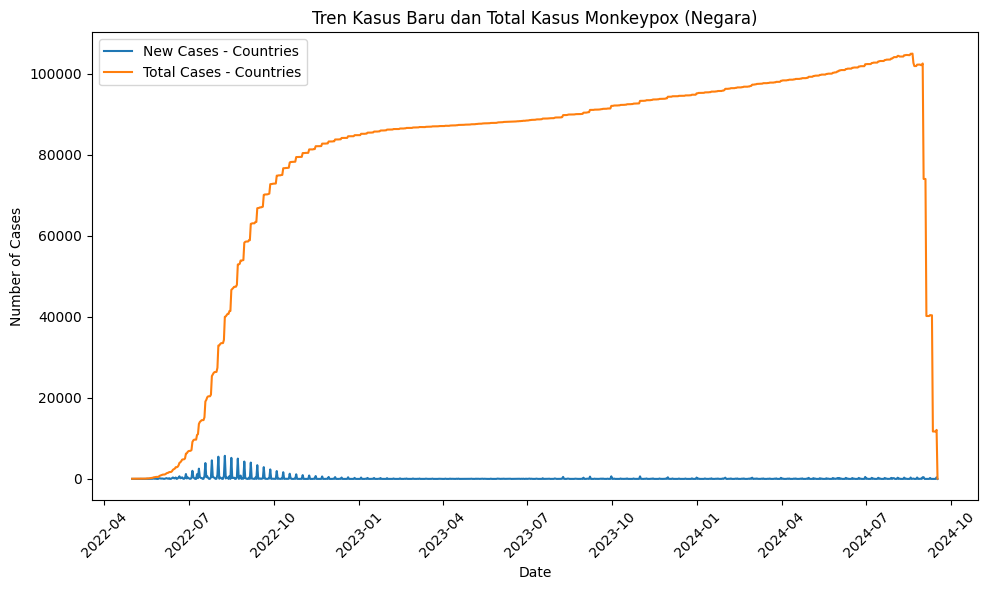

c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option i

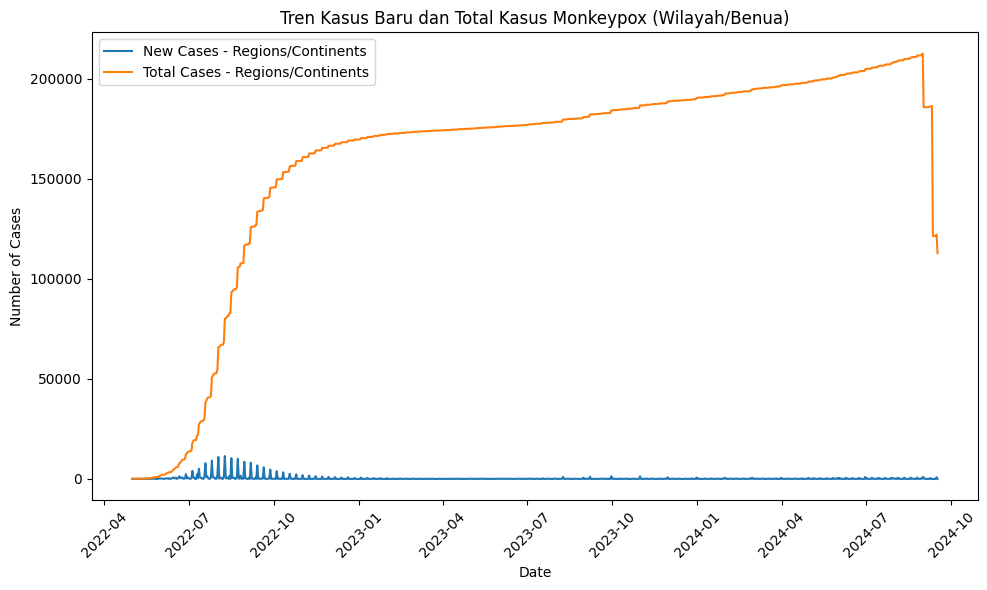

In [124]:
# Visualisasi tren kasus baru dan total kasus dari waktu ke waktu (Negara)
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='new_cases', data=data_grouped_by_date_countries, label='New Cases - Countries')
sns.lineplot(x='date', y='total_cases', data=data_grouped_by_date_countries, label='Total Cases - Countries')
plt.title('Tren Kasus Baru dan Total Kasus Monkeypox (Negara)')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Melihat perkembangan kasus baru dan total kasus dari waktu ke waktu untuk wilayah/benua
data_grouped_by_date_regions = regions_data.groupby('date').agg({
    'new_cases': 'sum',
    'total_cases': 'sum',
    'new_deaths': 'sum',
    'total_deaths': 'sum'
}).reset_index()

# Visualisasi tren kasus baru dan total kasus dari waktu ke waktu (Wilayah/Benua)
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='new_cases', data=data_grouped_by_date_regions, label='New Cases - Regions/Continents')
sns.lineplot(x='date', y='total_cases', data=data_grouped_by_date_regions, label='Total Cases - Regions/Continents')
plt.title('Tren Kasus Baru dan Total Kasus Monkeypox (Wilayah/Benua)')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**2. Regional Comparisons: Perbandingan Antar Negara/Wilayah**

c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


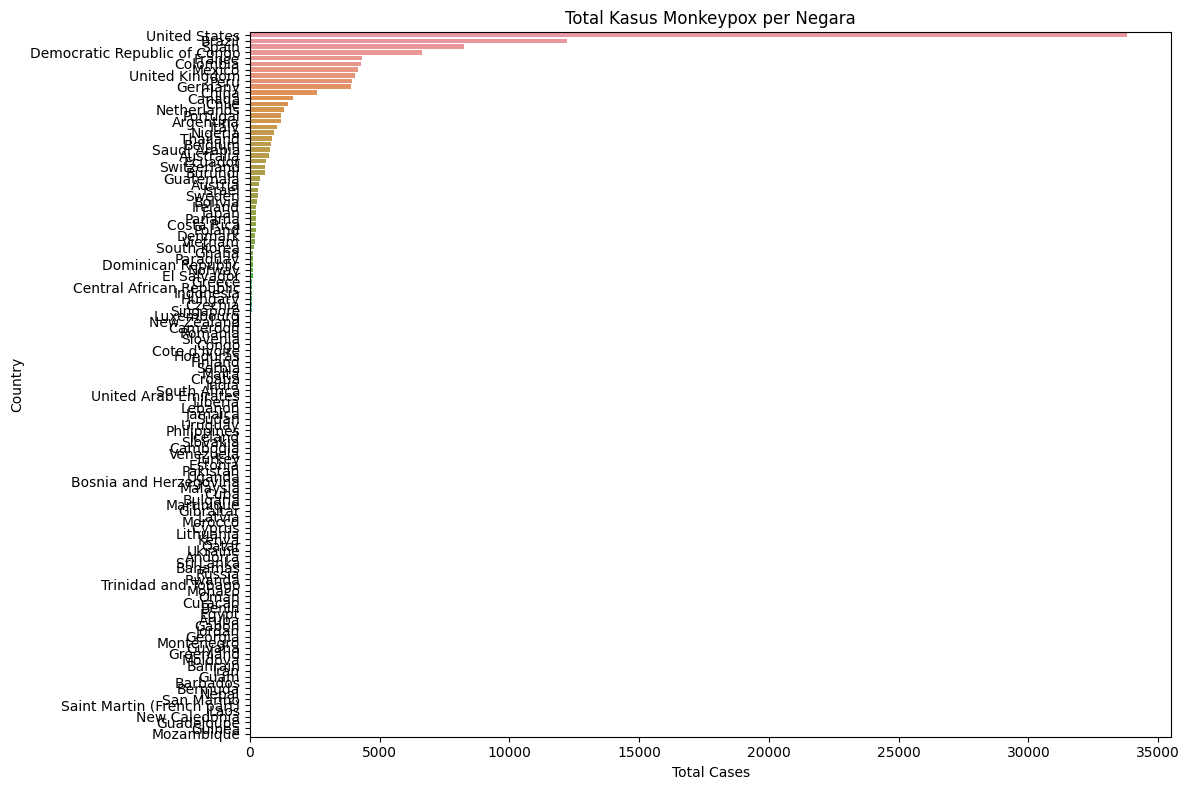

c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


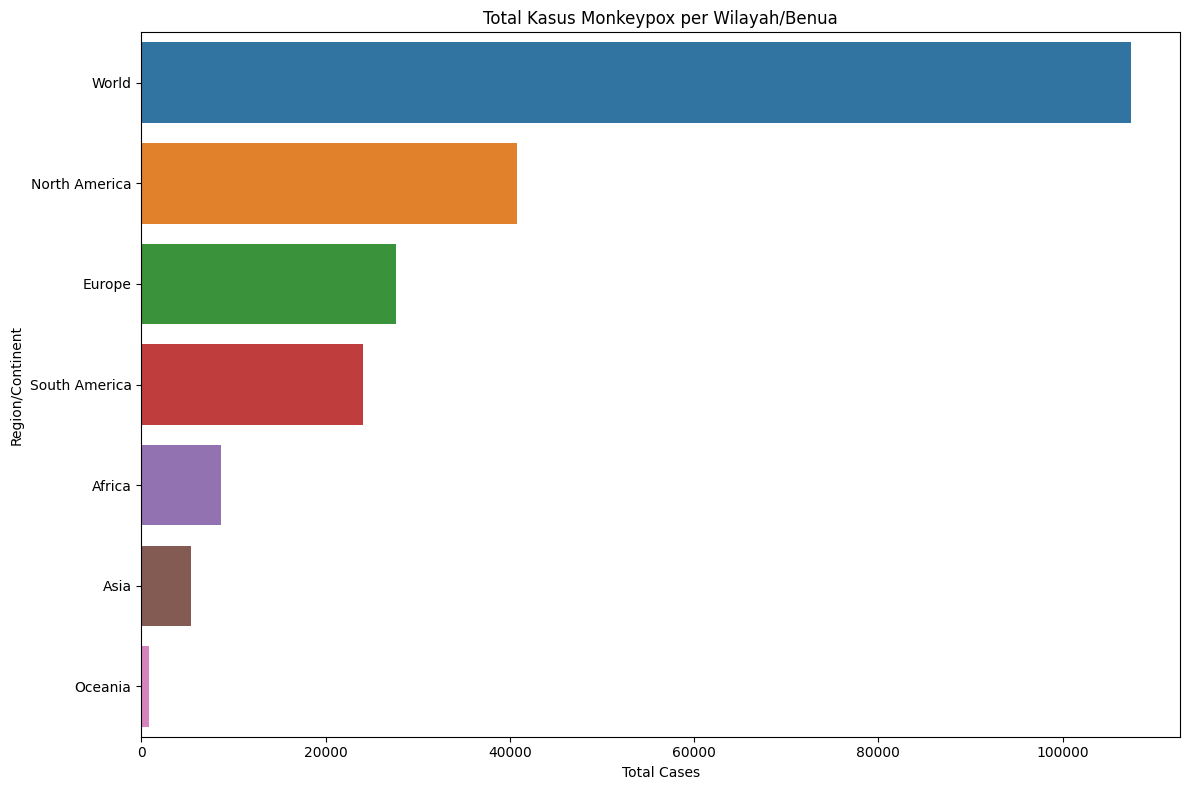

In [125]:
# Visualisasi: Total Kasus dan Kematian per Negara
plt.figure(figsize=(12, 8))
sns.barplot(x='total_cases', y='location', data=data_grouped_by_location_countries.sort_values('total_cases', ascending=False))
plt.title('Total Kasus Monkeypox per Negara')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# Visualisasi: Total Kasus dan Kematian per Wilayah/Benua
plt.figure(figsize=(12, 8))
sns.barplot(x='total_cases', y='location', data=data_grouped_by_location_regions.sort_values('total_cases', ascending=False))
plt.title('Total Kasus Monkeypox per Wilayah/Benua')
plt.xlabel('Total Cases')
plt.ylabel('Region/Continent')
plt.tight_layout()
plt.show()


**3. Demographic Trends: Dampak Berdasarkan Wilayah**

c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


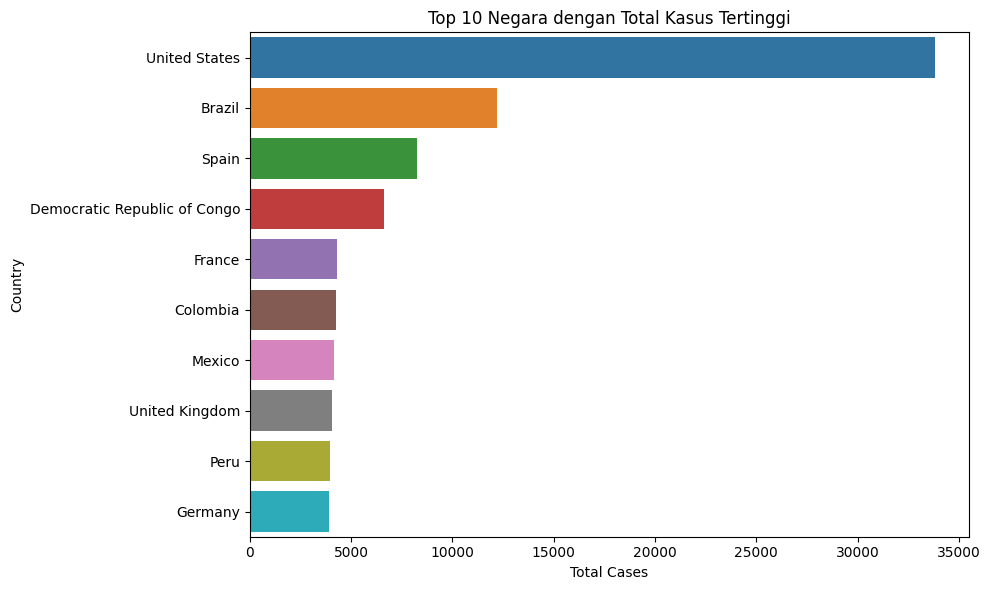

In [126]:
# Visualisasi: Negara dengan Total Kasus Tertinggi
plt.figure(figsize=(10, 6))
sns.barplot(x='total_cases', y='location', data=top_countries)
plt.title('Top 10 Negara dengan Total Kasus Tertinggi')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

**4. Temporal Analysis: Analisis Waktu Penyebaran**

c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecat

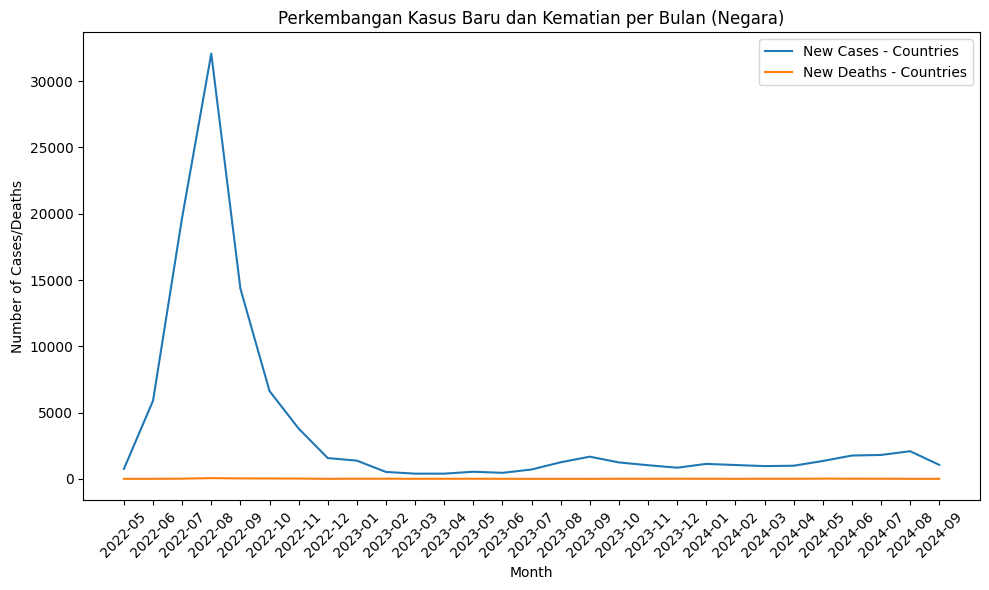

In [127]:
# Visualisasi: Perkembangan Kasus Baru per Bulan
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='new_cases', data=cases_per_month_countries, label='New Cases - Countries')
sns.lineplot(x='month', y='new_deaths', data=cases_per_month_countries, label='New Deaths - Countries')
plt.title('Perkembangan Kasus Baru dan Kematian per Bulan (Negara)')
plt.xlabel('Month')
plt.ylabel('Number of Cases/Deaths')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


**5. Identification of High-risk Regions: Top Locations by Total New Cases and Deaths**

In [128]:
# Filter top 10 locations (countries) with highest new cases
top_10_locations_by_cases = data_grouped_by_location_countries.nlargest(10, 'new_cases')
plt.figure(figsize=(12, 6))
sns.barplot(x='total_cases', y='location', data=top_10_locations_by_cases, palette='viridis')
plt.title('Top 10 Locations with Highest New Cases')
plt.xlabel('New Cases')
plt.ylabel('Location')
plt.show()

# Filter top 10 locations (countries) with highest total deaths
top_10_locations_by_deaths = data_grouped_by_location_countries.nlargest(10, 'new_deaths')
plt.figure(figsize=(12, 6))
sns.barplot(x='total_deaths', y='location', data=top_10_locations_by_deaths, palette='magma')
plt.title('Top 10 Locations with Highest New Deaths')
plt.xlabel('New Deaths')
plt.ylabel('Location')
plt.show()

KeyError: 'new_cases'

## **Export to File**

In [33]:
# Path to save the modified CSV file
file_name = input("Enter the file name to save (without the .csv extension): ")

In [34]:
# Path to save the modified CSV file
output_file_path = f'{file_name}.csv'

In [35]:
data_cleaned.to_csv(output_file_path)
# Fungsi dari function .to_csv adalah untuk menyimpan data ke dalam bentuk file dengan ekstensi .csv

In [36]:
print(f"The file has been saved to: {output_file_path}")

The file has been saved to: cleaned_data.csv
